# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from dateutil.relativedelta import relativedelta
import numpy as np 

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

browser.visit(url)

html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

temp_soup = soup(html, 'html.parser')


In [5]:
# Extract all rows of data

all_row = temp_soup.find_all('tr', class_="data-row")
all_row

# Create header for dataset

header = temp_soup.find('tr')
header

header = header.find_all('th')
header_list = [x.text for x in header]
header_list


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list

temp_summary =[]

# Loop through the scraped data to create a list of rows

for temp in all_row:
    row = temp.find_all('td')
    temp_list = [x.text for x in row]
    temp_summary.append(temp_list)
    
temp_summary

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names


df = pd.DataFrame(temp_summary, columns=header_list)


In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')[0]
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [10]:
# Change data types for data analysis

print("DataFrame:")

print(df)

# Apply the data type attribute

result = df.dtypes

print("Output:")

print(result)

DataFrame:
        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]
Output:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: obje

In [11]:
# convert all columns of DataFrame

# Convert ID
df[["id"]] = df[["id"]].apply(pd.to_numeric)

# Convert date
df[["terrestrial_date"]] = df[["terrestrial_date"]].apply(pd.to_datetime)

# Convert sol, number of elapsed sols
df[["sol"]] = df[["sol"]].apply(pd.to_numeric)

# Convert ls, solar longitude
df[["ls"]] = df[["ls"]].apply(pd.to_numeric)

# Convert months
df[['month']] = df[["month"]].apply(pd.to_numeric)

# Convert temperature
df[["min_temp"]] = df[["min_temp"]].apply(pd.to_numeric)

# Convert pressure, atmospheric pressure
df[["pressure"]] = df[["pressure"]].apply(pd.to_numeric)

df["terrestrial_date"].dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [12]:
# Confirm type changes were successful by examining data types again
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
#months = df.count('month')

# months

df['month'].value_counts().sort_index(ascending=False).to_frame() 

,month
12,166
11,138
10,112
9,134
8,141
7,142
6,147
5,149
4,194
3,192


In [14]:
# 2. How many Martian days' worth of data are there?
df['ls'].value_counts().to_frame() 


,ls
64,8
91,8
96,8
86,8
55,8
...,...
277,2
279,2
285,2
275,1


In [15]:
# 3. What is the average low temperature by month?

min_temp_by_month = df.groupby('month')['min_temp'].mean()
print(min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


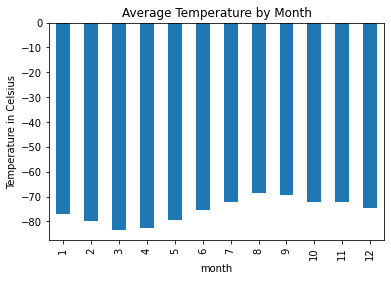

In [36]:
# Plot the average temperature by month

plt.plot
min_temp_by_month.plot(kind='bar')
plt.ylabel('Temperature in Celsius')
plt.title("Average Temperature by Month")
plt.show()



In [32]:
# Identify the coldest and hottest months in Curiosity's location

# Coldest

coldest_month = df.groupby('month')['min_temp'].min().sort_values(ascending=False).to_frame()
print(coldest_month)

       min_temp
month          
8         -75.0
11        -78.0
9         -78.0
7         -78.0
12        -81.0
10        -81.0
1         -82.0
6         -84.0
5         -85.0
2         -86.0
4         -89.0
3         -90.0


The coldest month on Mars is the 3rd month at -90.0 Celsius

In [31]:
# Hottest

hottest_month = df.groupby('month')['min_temp'].max().sort_values(ascending=False).to_frame()
print(hottest_month)

       min_temp
month          
1         -62.0
9         -63.0
8         -63.0
7         -65.0
10        -66.0
11        -67.0
12        -70.0
6         -71.0
5         -74.0
2         -76.0
4         -77.0
3         -77.0


The hottest month on Mars is the first month at -62 Celsius

In [30]:
# 4. Average pressure by Martian month

pressure_by_month = df.groupby('month')['pressure'].mean().sort_values().to_frame()
print(pressure_by_month)


         pressure
month            
6      745.054422
5      748.557047
7      795.105634
4      806.329897
12     842.156627
11     857.014493
1      862.488506
8      873.829787
3      877.322917
10     887.312500
2      889.455056
9      913.305970


Atmospheric pressure is, on average, lowest in the 6th month and highest in the 9th.

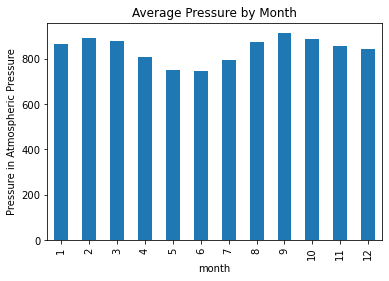

In [20]:
# Plot the average pressure by month

plt.plot
pressure_by_month.plot(kind='bar')
plt.ylabel('Pressure in Atmospheric Pressure')
plt.title("Average Pressure by Month")
plt.show()

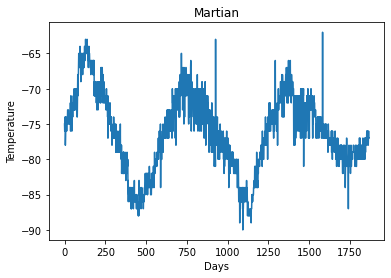

In [42]:
# 5. How many terrestrial (earth) days are there in a Martian year?

df['min_temp'].plot()
plt.ylabel('Temperature')
plt.xlabel('Days')
plt.title('Earth days in a Martian Year')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
df = df.to_csv('temp.csv')

In [ ]:
browser.quit()